## Reading all the files

In [1]:
import json

In [2]:
with open("./Spotify Account Data/StreamingHistory_music_0.json") as f :
    history_zero = json.load(f)
    print(json.dumps(history_zero,sort_keys=True,indent=2))

[
  {
    "artistName": "Spring",
    "endTime": "2023-05-16 01:52",
    "msPlayed": 332693,
    "trackName": "Bourgenvilla"
  },
  {
    "artistName": "Bunga Citra Lestari",
    "endTime": "2023-05-16 01:56",
    "msPlayed": 208253,
    "trackName": "Ingkar"
  },
  {
    "artistName": "Kerispatih",
    "endTime": "2023-05-16 02:00",
    "msPlayed": 272707,
    "trackName": "Bila Rasaku Ini Rasamu"
  },
  {
    "artistName": "Eye",
    "endTime": "2023-05-16 02:05",
    "msPlayed": 297506,
    "trackName": "Satu Nama Tetap Dihati"
  },
  {
    "artistName": "Hazami",
    "endTime": "2023-05-16 02:10",
    "msPlayed": 270426,
    "trackName": "Sonata Musim Salju"
  },
  {
    "artistName": "Fabio Asher",
    "endTime": "2023-05-16 02:14",
    "msPlayed": 246730,
    "trackName": "Rumah Singgah"
  },
  {
    "artistName": "Danial Zaini",
    "endTime": "2023-05-16 02:15",
    "msPlayed": 74117,
    "trackName": "Ku Tak Rela (Full Version)"
  },
  {
    "artistName": "In-Team",
    "endTi

In [3]:
with open("./Spotify Account Data/StreamingHistory_music_1.json") as f :
    history_one = json.load(f)
    print(json.dumps(history_one,sort_keys=True,indent=2))

[
  {
    "artistName": "Sam Smith",
    "endTime": "2023-12-11 19:45",
    "msPlayed": 213869,
    "trackName": "Diamonds"
  },
  {
    "artistName": "Leanna Firestone",
    "endTime": "2023-12-11 19:48",
    "msPlayed": 195322,
    "trackName": "Strawberry Mentos"
  },
  {
    "artistName": "Anna Hamilton",
    "endTime": "2023-12-11 19:52",
    "msPlayed": 248448,
    "trackName": "Bad Liar"
  },
  {
    "artistName": "Shawn Mendes",
    "endTime": "2023-12-11 19:56",
    "msPlayed": 217773,
    "trackName": "Imagination"
  },
  {
    "artistName": "\u6850\u751f\u4e00\u99ac(\u9ed2\u7530\u5d07\u77e2)",
    "endTime": "2023-12-11 20:01",
    "msPlayed": 291266,
    "trackName": "Bakamitai - Taxi Driver Edition"
  },
  {
    "artistName": "Bruno Mars",
    "endTime": "2023-12-11 20:02",
    "msPlayed": 4240,
    "trackName": "It Will Rain"
  },
  {
    "artistName": "Pink Sweat$",
    "endTime": "2023-12-11 20:02",
    "msPlayed": 52069,
    "trackName": "At My Worst"
  },
  {
    "art

In [4]:
with open("./Spotify Account Data/StreamingHistory_music_2.json") as f :
    history_two = json.load(f)
    print(json.dumps(history_two,sort_keys=True,indent=2))

[
  {
    "artistName": "Troye Sivan",
    "endTime": "2024-04-16 08:20",
    "msPlayed": 198448,
    "trackName": "Got Me Started"
  },
  {
    "artistName": "Troye Sivan",
    "endTime": "2024-04-16 08:21",
    "msPlayed": 52367,
    "trackName": "Silly"
  },
  {
    "artistName": "Taylor Swift",
    "endTime": "2024-04-16 08:25",
    "msPlayed": 231706,
    "trackName": "Mine (Taylor's Version)"
  },
  {
    "artistName": "Taylor Swift",
    "endTime": "2024-04-16 08:29",
    "msPlayed": 261230,
    "trackName": "Sparks Fly (Taylor\u2019s Version)"
  },
  {
    "artistName": "Taylor Swift",
    "endTime": "2024-04-16 08:34",
    "msPlayed": 294189,
    "trackName": "Back To December (Taylor's Version)"
  },
  {
    "artistName": "Taylor Swift",
    "endTime": "2024-04-16 08:38",
    "msPlayed": 242473,
    "trackName": "Speak Now (Taylor's Version)"
  },
  {
    "artistName": "Taylor Swift",
    "endTime": "2024-04-16 08:45",
    "msPlayed": 405906,
    "trackName": "Dear John (Tayl

In [5]:
print(history_one[0])

{'endTime': '2023-12-11 19:45', 'artistName': 'Sam Smith', 'trackName': 'Diamonds', 'msPlayed': 213869}


## Initiating a proper dataframe

In [6]:
import pandas as pd
df_unique = pd.DataFrame(columns = ["Title", "Artist", "Total duration played (ms)", "Total time played"])
df_dump = pd.DataFrame(columns = ["Title", "Artist", "Date", "Year", "Months", "Day", "Duration played (ms)"])

In [7]:
df_unique.head()

Empty DataFrame
Columns: [Title, Artist, Total duration played (ms), Total time played]
Index: []

In [8]:
df_dump.head()

Empty DataFrame
Columns: [Title, Artist, Date, Year, Months, Day, Duration played (ms)]
Index: []

## Read the list into the dataframe

The json was read as a list, and each item is a dictionary

In [9]:
print(history_one[0]["endTime"][0:10])

2023-12-11


In [10]:
from datetime import datetime

def add_unique(dictionary_passed) :

    track_title = dictionary_passed["trackName"]
    track_artist = dictionary_passed["artistName"]
    track_played = int(dictionary_passed["msPlayed"])

    if track_title in df_unique["Title"].values :
        df_unique.loc[df_unique["Title"] == track_title, "Total duration played (ms)"] += track_played
        df_unique.loc[df_unique["Title"] == track_title, "Total time played"] += 1
    else :
        df_unique.loc[len(df_unique["Title"])] = [track_title, track_artist, track_played, 1]

def add_dump(dictionary_passed) :

    track_title = dictionary_passed["trackName"]
    track_artist = dictionary_passed["artistName"]
    track_played = int(dictionary_passed["msPlayed"])

    track_date = datetime.strptime(dictionary_passed["endTime"][0:10], "%Y-%m-%d").date()
    track_year = int(dictionary_passed["endTime"][0:4])
    track_month = int(dictionary_passed["endTime"][5:7])
    track_day = int(dictionary_passed["endTime"][8:10])

    df_dump.loc[len(df_dump["Title"])] = [track_title, track_artist, track_date, track_year, track_month, track_day, track_played]

In [11]:
for i in history_zero :
    add_unique(i)
    add_dump(i)

for i in history_one :
    add_unique(i)
    add_dump(i)

for i in history_two :
    add_unique(i)
    add_dump(i)

In [12]:
df_unique.head()

Title               Artist  Total duration played (ms)  \
0            Bourgenvilla               Spring                     8144198   
1                  Ingkar  Bunga Citra Lestari                     5396316   
2  Bila Rasaku Ini Rasamu           Kerispatih                     7413004   
3  Satu Nama Tetap Dihati                  Eye                     7300822   
4      Sonata Musim Salju               Hazami                     8414315   

   Total time played  
0                 30  
1                 30  
2                 29  
3                 26  
4                 32

In [13]:
df_dump.head()

Title               Artist        Date  Year  Months  Day  \
0            Bourgenvilla               Spring  2023-05-16  2023       5   16   
1                  Ingkar  Bunga Citra Lestari  2023-05-16  2023       5   16   
2  Bila Rasaku Ini Rasamu           Kerispatih  2023-05-16  2023       5   16   
3  Satu Nama Tetap Dihati                  Eye  2023-05-16  2023       5   16   
4      Sonata Musim Salju               Hazami  2023-05-16  2023       5   16   

   Duration played (ms)  
0                332693  
1                208253  
2                272707  
3                297506  
4                270426

## Manual checking to prove check if all datapoints are inserted properly

In [14]:
print(f"Total points from df_unique : {df_unique["Total time played"].sum()}")

Total points from df_unique : 23349


In [15]:
print(f"Total points from df_dump : {df_dump["Title"].values.size}")

Total points from df_dump : 23349


In [16]:
print(f"Total points from initial list : {len(history_zero) + len(history_one) + len(history_two)}")

Total points from initial list : 23349


## Basic statistics

In [17]:
print(f"Number of unique songs heard : {len(df_unique["Title"].unique())}")

Number of unique songs heard : 1607


In [18]:
print(f"Number of unique artist heard : {len(df_unique["Artist"].unique())}")

Number of unique artist heard : 704


In [19]:
max_time_filter = df_unique["Total time played"] == max(df_unique["Total time played"])
max_time = df_unique[max_time_filter]
max_time.head()

Title        Artist  \
521  Back To December (Taylor's Version)  Taylor Swift   

     Total duration played (ms)  Total time played  
521                    36823732                136

In [20]:
max_duration_filter = df_unique["Total duration played (ms)"] == max(df_unique["Total duration played (ms)"])
max_duration = df_unique[max_duration_filter]
max_duration.head()

Title        Artist  Total duration played (ms)  \
518  Enchanted (Taylor's Version)  Taylor Swift                    39852334   

     Total time played  
518                129

## Listening history based on date

In [21]:
date_count = pd.DataFrame(columns = ["Date", "Total Count", "Total duration"])
date_count.head()

Empty DataFrame
Columns: [Date, Total Count, Total duration]
Index: []

In [22]:
from datetime import timedelta

def count_filter(delta) :

    start_date = "2023-05-16"
    startdate_format = datetime.strptime(start_date, "%Y-%m-%d").date()
    new_date = startdate_format + timedelta(days = delta)

    date_filter = df_dump["Date"] == new_date
    date_df = df_dump[date_filter]

    date_count.loc[delta] = [new_date, len(date_df["Title"].values), date_df["Duration played (ms)"].sum()]

for i in range(367) :
    count_filter(i)

In [23]:
date_count.tail(20)

Date  Total Count  Total duration
347  2024-04-27           39         8424452
348  2024-04-28           77        13629939
349  2024-04-29          126        25753819
350  2024-04-30          156        29739528
351  2024-05-01           95        20515743
352  2024-05-02           63        13651547
353  2024-05-03          117        25464689
354  2024-05-04           55         9034822
355  2024-05-05           47         8326595
356  2024-05-06          154        34641953
357  2024-05-07          134        27755190
358  2024-05-08           70        14767963
359  2024-05-09           98        19856169
360  2024-05-10           63        13444237
361  2024-05-11           33         6824184
362  2024-05-12           83        18546649
363  2024-05-13          107        21842679
364  2024-05-14          130        26708564
365  2024-05-15          186        42249256
366  2024-05-16           59        13362786

## Data visualisation

In [24]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

### Rough visualisation per day

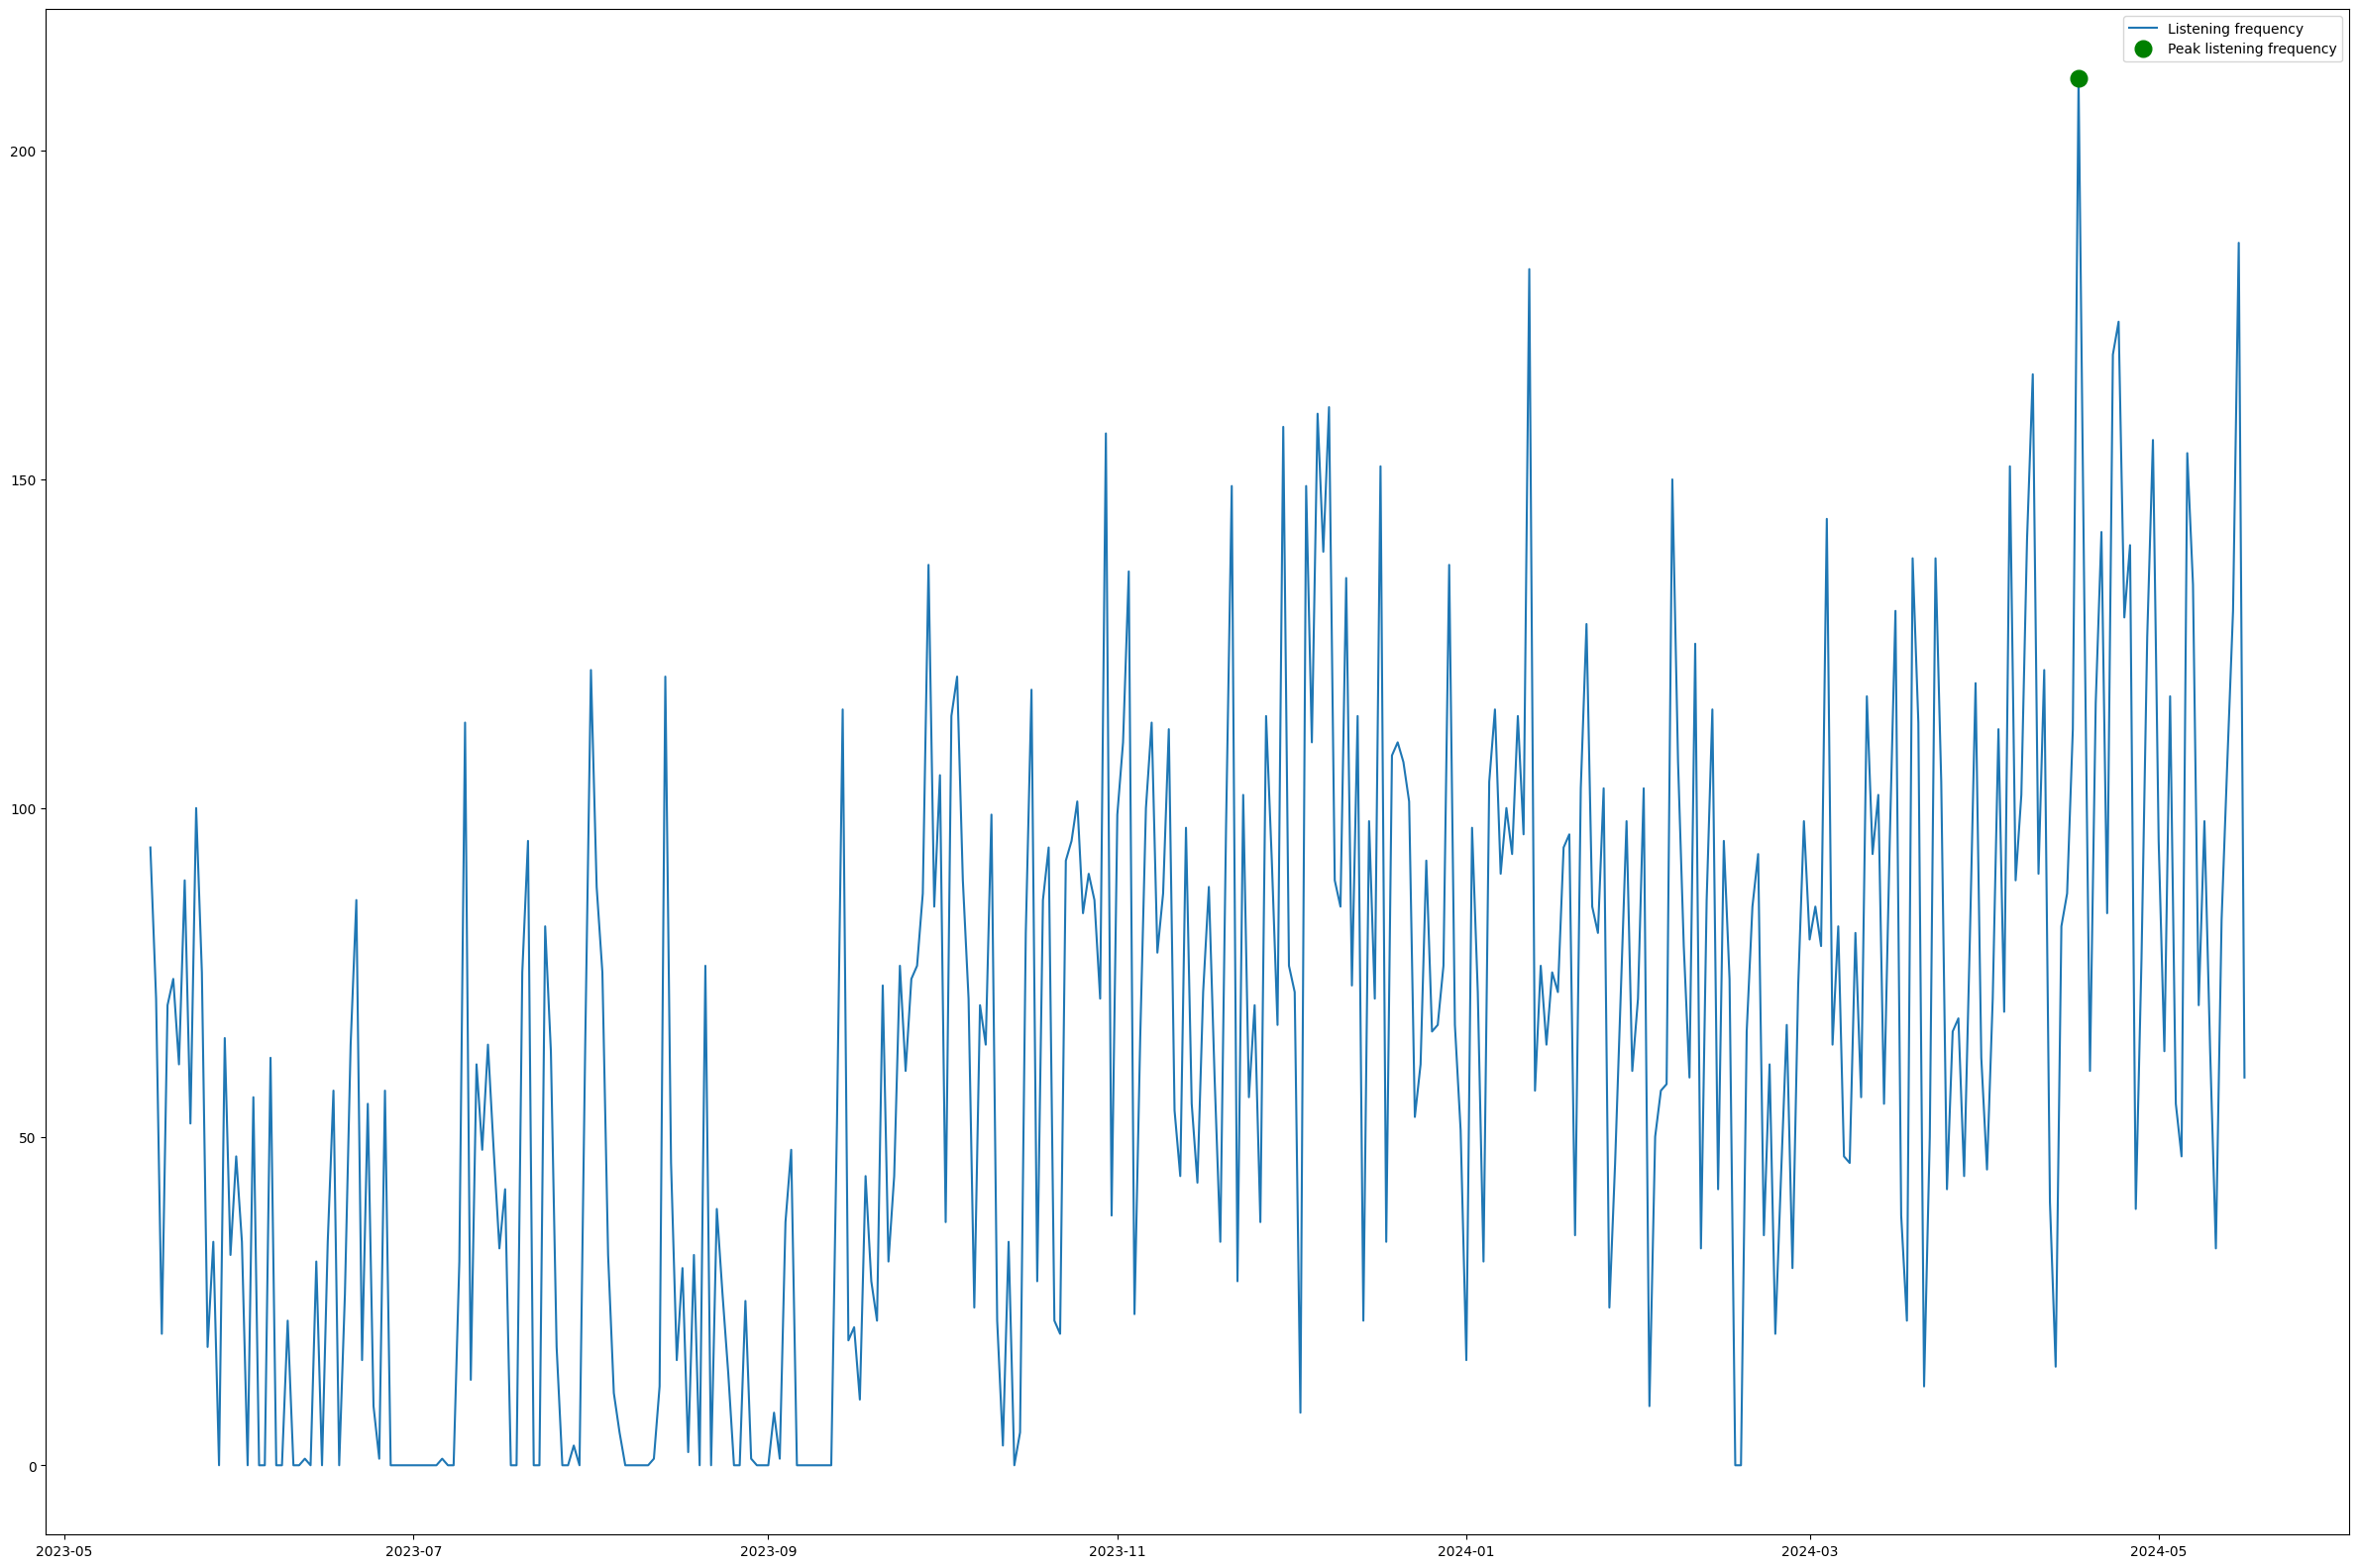

In [25]:
plt.figure(figsize = (30, 20))
plt.plot("Date", "Total Count", data = date_count, label = "Listening frequency")

plot_filter = date_count["Total Count"] == max(date_count["Total Count"].values)
plt.plot(date_count[plot_filter]["Date"], max(date_count["Total Count"].values), 'go', markersize = 12, label = "Peak listening frequency")
plt.legend()

Text(0, 0.5, 'Per day frequency')

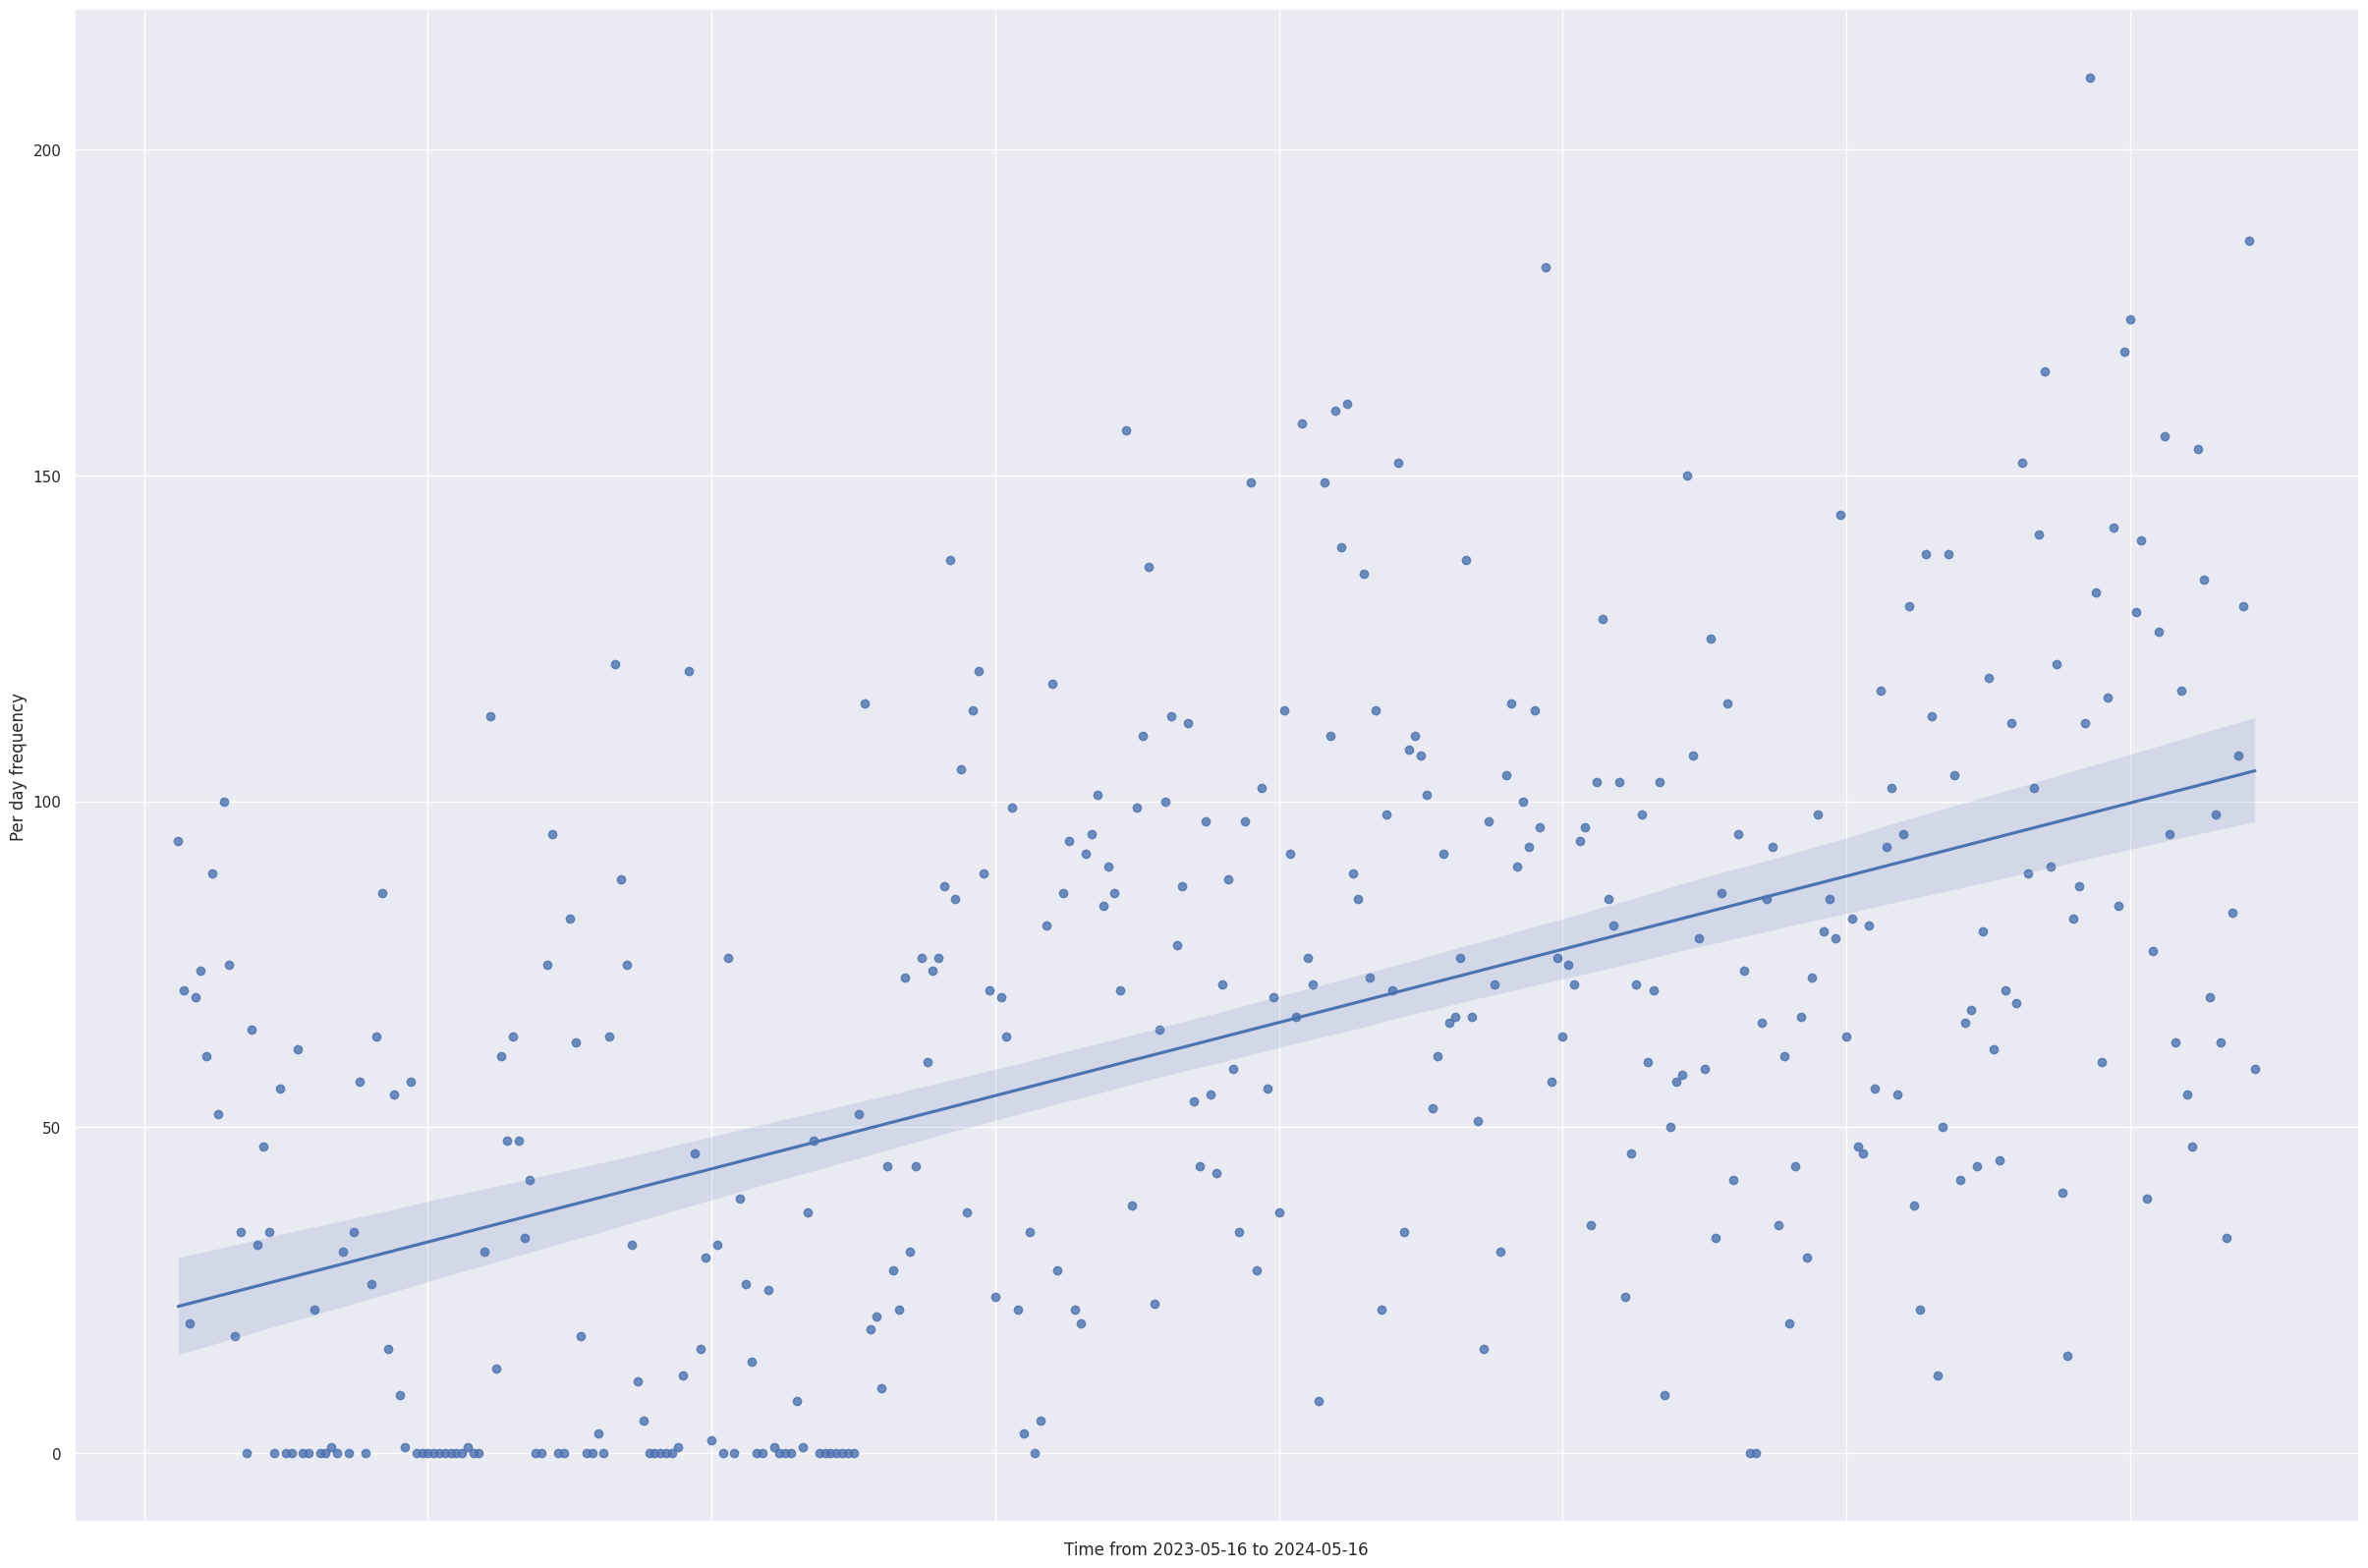

In [26]:
date_count_copy = date_count.copy()
date_count_copy["Date Ordinal"] = date_count_copy["Date"].apply(lambda x : x.toordinal())

sns.set(style = "darkgrid")
plt.figure(figsize = (30,20))
sns.regplot(x = "Date Ordinal", y = "Total Count", data = date_count_copy)
plt.gca().set_xticklabels([])

plt.xlabel("Time from 2023-05-16 to 2024-05-16")
plt.ylabel("Per day frequency")